In [ ]:
#importing important libraries

# Libraries for data manipulation
import pandas as pd
import numpy as np
import glob
import math

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for data train and test
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#Library for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix

In [ ]:
# NOEXPORT

import os
import shutil
from google.colab import drive


BATCH_ID = "IoT Dataset"
TARGET_PATH = "/mnt"


drive.mount('/content/drive', force_remount=True)

if os.path.islink(TARGET_PATH):
    os.unlink(TARGET_PATH)

if os.path.isdir(TARGET_PATH):
    shutil.rmtree(TARGET_PATH)

os.symlink(
    f'/content/drive/My Drive/{BATCH_ID}',
    TARGET_PATH
)

Mounted at /content/drive


In [ ]:
# Specify the path to your CSV files (current directory)
path = '/mnt/*.csv'

# Use glob to get all the csv files in the folder
all_files = glob.glob(path)

# Take only the first 5 files
selected_files = all_files[:1]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through the first 10 files and read them into DataFrames
for filename in selected_files:
    df = pd.read_csv(filename)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)


print("First 5 files merged successfully!")

First 5 files merged successfully!


# DATA OVERVIEW

In [ ]:
merged_df.sample(1)

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
544237,0.0,47,64.0,3905.34735,0.0,0.0,0.0,0.0,0.0,0.0,...,59200,592,592,592.0,0.0,592.0,0.000257,100,0.0,MIRAI-GREETH_FLOOD


In [ ]:
merged_df.shape

(712311, 40)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712311 entries, 0 to 712310
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    712311 non-null  float64
 1   Protocol Type    712311 non-null  int64  
 2   Time_To_Live     712311 non-null  float64
 3   Rate             712311 non-null  float64
 4   fin_flag_number  712311 non-null  float64
 5   syn_flag_number  712311 non-null  float64
 6   rst_flag_number  712311 non-null  float64
 7   psh_flag_number  712311 non-null  float64
 8   ack_flag_number  712311 non-null  float64
 9   ece_flag_number  712311 non-null  float64
 10  cwr_flag_number  712311 non-null  float64
 11  ack_count        712311 non-null  int64  
 12  syn_count        712311 non-null  int64  
 13  fin_count        712311 non-null  int64  
 14  rst_count        712311 non-null  int64  
 15  HTTP             712311 non-null  float64
 16  HTTPS            712311 non-null  floa

In [ ]:
merged_df.describe()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
count,712311.000000,712311.000000,712311.000000,7.123110e+05,712311.000000,712311.000000,712311.000000,712311.000000,712311.000000,712311.000000,...,712311.000000,712311.000000,712311.000000,712311.000000,712311.000000,712300.000000,712311.000000,712311.000000,712311.000000,7.123000e+05
mean,13.756737,9.086656,66.526660,inf,0.087460,0.206699,0.093386,0.094068,0.129968,0.000029,...,0.997183,10908.933592,79.884170,222.500479,130.897583,41.118678,130.897583,0.001900,95.508984,3.466137e+04
std,8.718496,9.082485,14.375848,NaN,0.280119,0.399664,0.283992,0.277324,0.316820,0.001848,...,0.018851,16764.737387,106.883922,586.944193,227.672158,181.578269,227.672158,0.883177,19.556937,4.118891e+05
min,0.000000,0.000000,0.000000,1.349521e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,60.000000,42.000000,54.000000,48.400000,0.000000,48.400000,0.000000,1.000000,0.000000e+00
25%,8.000000,6.000000,64.000000,1.141929e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000027,100.000000,0.000000e+00
50%,20.000000,6.000000,64.000000,2.461302e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000041,100.000000,0.000000e+00
75%,20.000000,17.000000,64.000000,3.797812e+04,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,...,1.000000,6010.000000,60.000000,74.000000,60.240000,0.600000,60.240000,0.000089,100.000000,3.600000e-01
max,60.000000,47.000000,255.000000,inf,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,...,1.000000,239413.000000,2974.000000,30474.000000,5367.500000,9533.007818,5367.500000,741.003442,100.000000,9.087824e+07


In [ ]:
merged_df.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [ ]:
merged_df.duplicated().sum()

167368

In [ ]:
merged_df.nunique()

,0
Header_Length,1230
Protocol Type,5
Time_To_Live,5691
Rate,109524
fin_flag_number,109
syn_flag_number,163
rst_flag_number,122
psh_flag_number,150
ack_flag_number,213
ece_flag_number,12


# DATA CLEANING AND PREPROCESSING

In [ ]:
merged_df.drop_duplicates(inplace=True)

In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [ ]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.shape

(544932, 42)

In [ ]:
merged_df['Label'].nunique()

34

In [ ]:
merged_df['Label'].unique()

array(['DDOS-PSHACK_FLOOD', 'MIRAI-GREIP_FLOOD', 'DOS-UDP_FLOOD',
       'DNS_SPOOFING', 'DDOS-ICMP_FLOOD', 'DDOS-TCP_FLOOD',
       'DDOS-SYN_FLOOD', 'DDOS-UDP_FLOOD', 'MITM-ARPSPOOFING',
       'DDOS-SYNONYMOUSIP_FLOOD', 'DOS-TCP_FLOOD', 'VULNERABILITYSCAN',
       'DOS-SYN_FLOOD', 'DDOS-RSTFINFLOOD', 'BENIGN', 'DDOS-SLOWLORIS',
       'DDOS-ICMP_FRAGMENTATION', 'MIRAI-GREETH_FLOOD',
       'RECON-HOSTDISCOVERY', 'MIRAI-UDPPLAIN', 'RECON-PORTSCAN',
       'DDOS-ACK_FRAGMENTATION', 'DDOS-UDP_FRAGMENTATION', 'RECON-OSSCAN',
       'BACKDOOR_MALWARE', 'DOS-HTTP_FLOOD', 'XSS', 'DDOS-HTTP_FLOOD',
       'BROWSERHIJACKING', 'SQLINJECTION', 'DICTIONARYBRUTEFORCE',
       'COMMANDINJECTION', 'RECON-PINGSWEEP', 'UPLOADING_ATTACK'],
      dtype=object)

In [ ]:
# Define the categorization rules
def categorize_label(label):
    label = label.strip().upper()

    # DDoS Category
    if label.startswith('DDOS-'):
        subtype = label.split('-')[1].replace('_', ' ').title()
        if 'Ack Fragmentation' in subtype: return ('DDoS', 'ACK fragmentation')
        elif 'Udp Flood' in subtype: return ('DDoS', 'UDP flood')
        elif 'Slowloris' in subtype: return ('DDoS', 'SlowLoris')
        elif 'Icmp Flood' in subtype: return ('DDoS', 'ICMP flood')
        elif 'Rstfinflood' in subtype: return ('DDoS', 'RSTFIN flood')
        elif 'Pshack Flood' in subtype: return ('DDoS', 'PSHACK flood')
        elif 'Http Flood' in subtype: return ('DDoS', 'HTTP flood')
        elif 'Udp Fragmentation' in subtype: return ('DDoS', 'UDP fragmentation')
        elif 'Tcp Flood' in subtype: return ('DDoS', 'TCP flood')
        elif 'Syn Flood' in subtype: return ('DDoS', 'SYN flood')
        elif 'Synonymousip Flood' in subtype: return ('DDoS', 'SynonymousIP flood')
        return ('DDoS', 'Other DDoS')

    # Brute Force
    elif 'DICTIONARYBRUTEFORCE' in label:
        return ('Brute Force', 'Dictionary brute force')

    # Spoofing
    elif 'ARPSPOOFING' in label:
        return ('Spoofing', 'Arp spoofing')
    elif 'DNS_SPOOFING' in label:
        return ('Spoofing', 'DNS spoofing')

    # DoS
    elif label.startswith('DOS-'):
        subtype = label.split('-')[1].replace('_', ' ').title()
        if 'Tcp Flood' in subtype: return ('DoS', 'TCP flood')
        elif 'Http Flood' in subtype: return ('DoS', 'HTTP flood')
        elif 'Syn Flood' in subtype: return ('DoS', 'SYN flood')
        elif 'Udp Flood' in subtype: return ('DoS', 'UDP flood')
        return ('DoS', 'Other DoS')

    # Recon
    elif label.startswith('RECON-') or 'VULNERABILITYSCAN' in label:
        if 'PINGSWEEP' in label: return ('Recon', 'Ping sweep')
        elif 'OSSCAN' in label: return ('Recon', 'OS scan')
        elif 'VULNERABILITYSCAN' in label: return ('Recon', 'Vulnerability scan')
        elif 'PORTSCAN' in label: return ('Recon', 'Port scan')
        elif 'HOSTDISCOVERY' in label: return ('Recon', 'Host discovery')
        return ('Recon', 'Other Recon')

    # Web-based
    elif any(x in label for x in ['SQLINJECTION', 'COMMANDINJECTION', 'BACKDOOR_MALWARE',
                                 'UPLOADING_ATTACK', 'XSS', 'BROWSERHIJACKING']):
        if 'SQLINJECTION' in label: return ('Web-based', 'Sql injection')
        elif 'COMMANDINJECTION' in label: return ('Web-based', 'Command injection')
        elif 'BACKDOOR_MALWARE' in label: return ('Web-based', 'Backdoor malware')
        elif 'UPLOADING_ATTACK' in label: return ('Web-based', 'Uploading attack')
        elif 'XSS' in label: return ('Web-based', 'XSS')
        elif 'BROWSERHIJACKING' in label: return ('Web-based', 'Browser hijacking')

    # Mirai
    elif label.startswith('MIRAI-'):
        subtype = label.split('-')[1]
        if 'GREIP' in subtype: return ('Mirai', 'GREIP flood')
        elif 'GREETH' in subtype: return ('Mirai', 'Greeth flood')
        elif 'UDPPLAIN' in subtype: return ('Mirai', 'UDPPlain')

    # Benign
    elif 'BENIGN' in label:
        return ('Benign', 'Benign')

    return ('Uncategorized', 'Uncategorized')

# Apply categorization to your DataFrame
# Assuming your DataFrame is called df with a 'label' column
merged_df[['Label_class', 'Attack_subtype']] = merged_df['Label'].apply(
    lambda x: pd.Series(categorize_label(x))
)

# Optional: Verify categorization
print(merged_df[['Label', 'Label_class', 'Attack_subtype']].value_counts())

Label                    Label_class  Attack_subtype        
DDOS-ICMP_FLOOD          DDoS         ICMP flood                108662
DDOS-UDP_FLOOD           DDoS         UDP flood                  82011
DDOS-TCP_FLOOD           DDoS         TCP flood                  68289
DDOS-PSHACK_FLOOD        DDoS         PSHACK flood               62171
DDOS-RSTFINFLOOD         DDoS         RSTFIN flood               61652
DDOS-SYN_FLOOD           DDoS         SYN flood                  61460
DDOS-SYNONYMOUSIP_FLOOD  DDoS         SynonymousIP flood         54749
DOS-UDP_FLOOD            DoS          UDP flood                  50371
DOS-TCP_FLOOD            DoS          TCP flood                  40391
DOS-SYN_FLOOD            DoS          SYN flood                  30620
BENIGN                   Benign       Benign                     16577
MIRAI-GREETH_FLOOD       Mirai        Greeth flood               15135
MIRAI-UDPPLAIN           Mirai        UDPPlain                   13342
MIRAI-GREIP_FLOO

# EXPLORATORY ANALYSIS

## UNIVARITE ANALYSIS

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

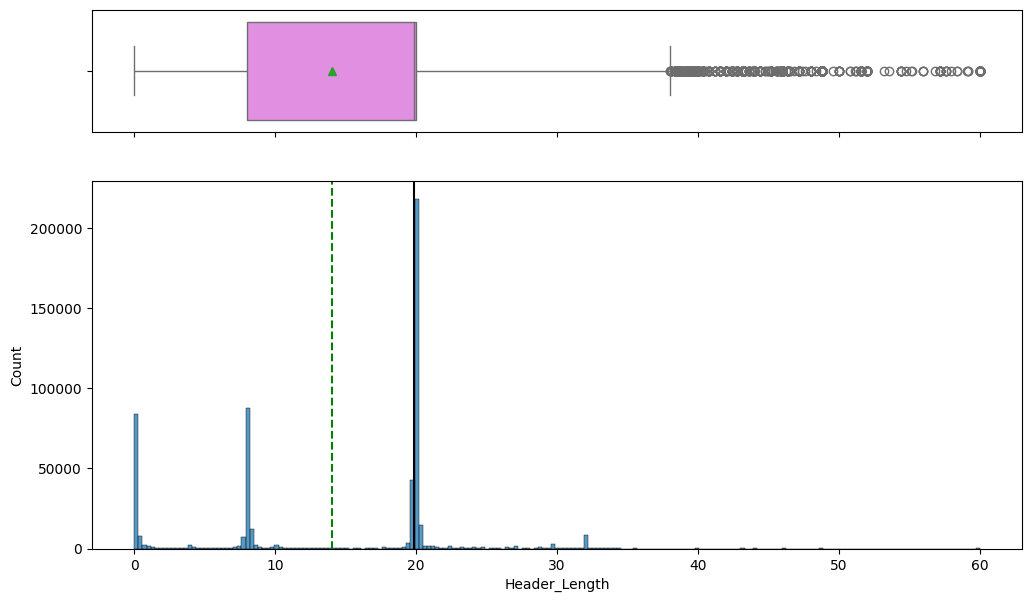

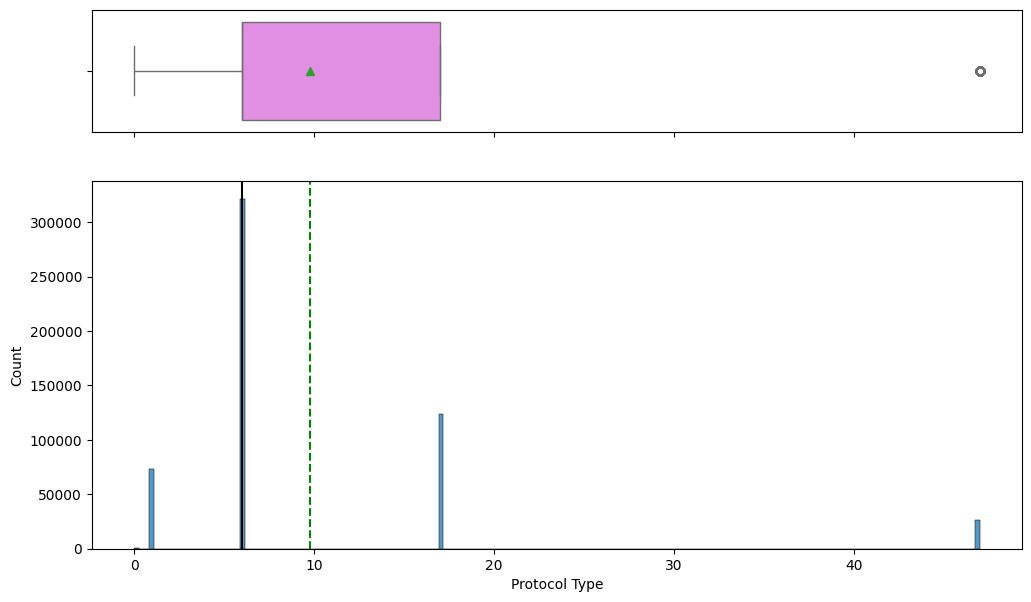

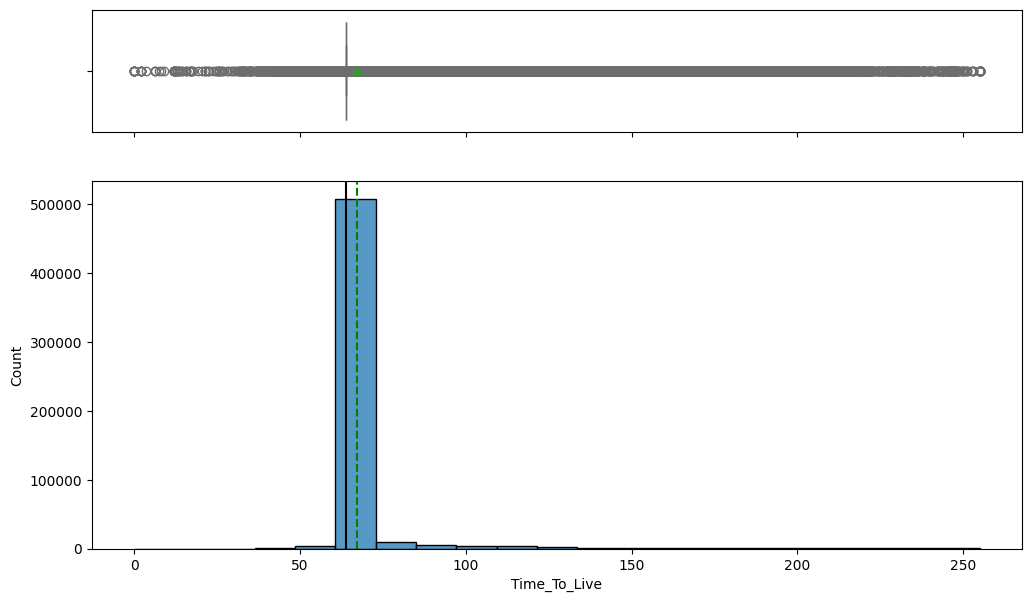

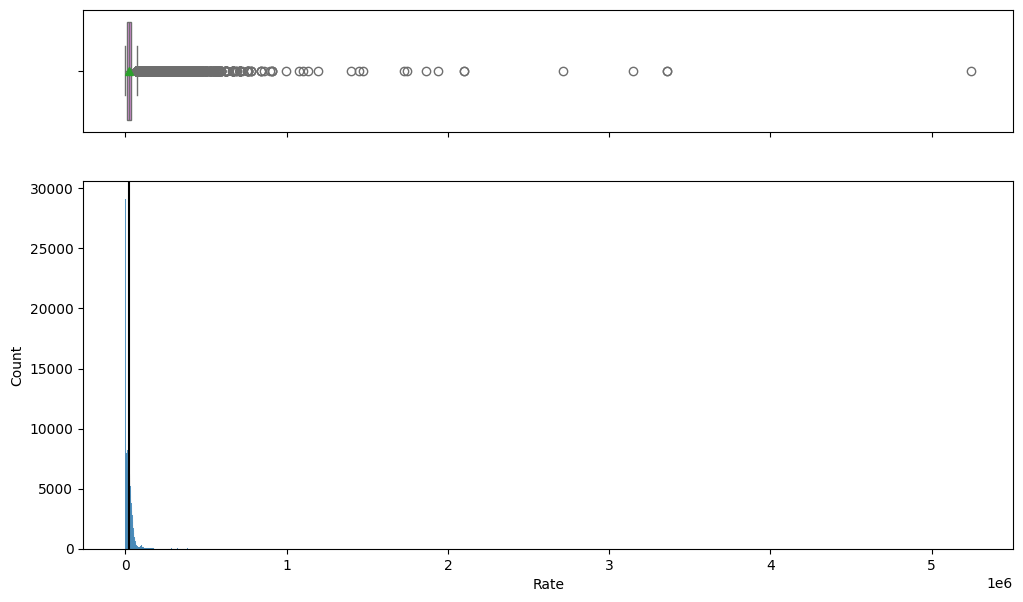

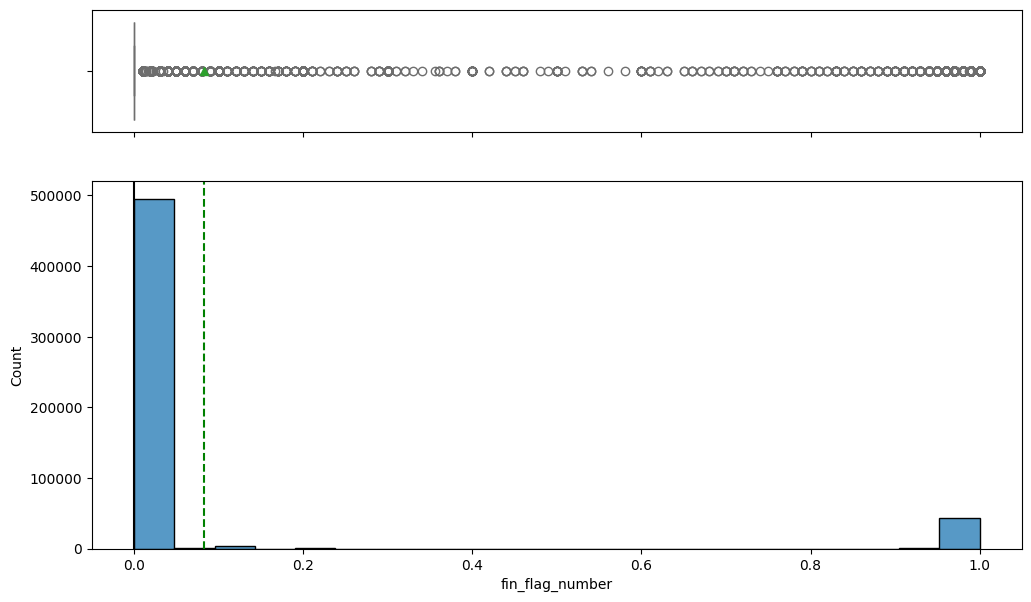

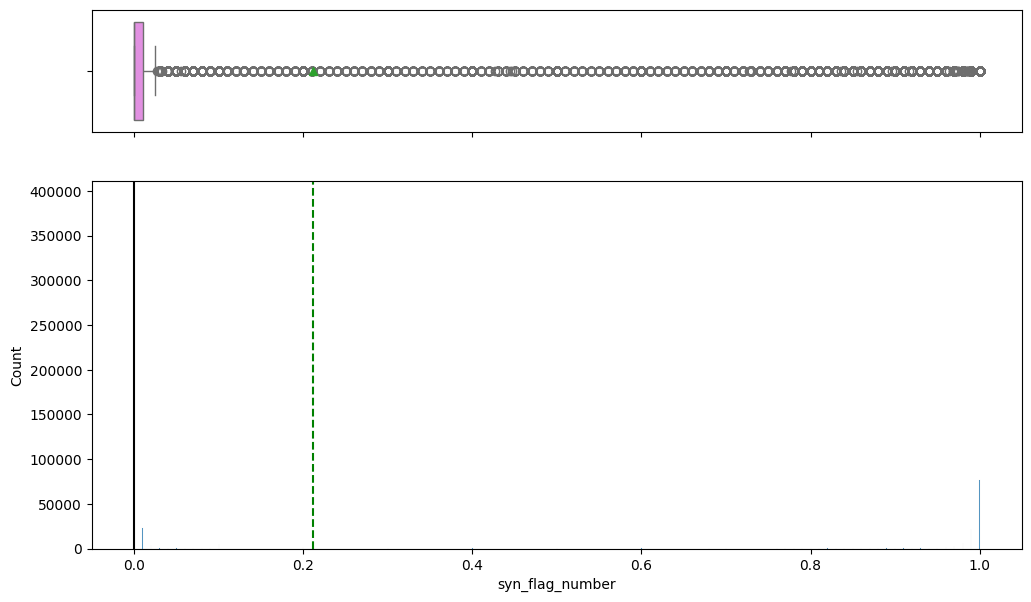

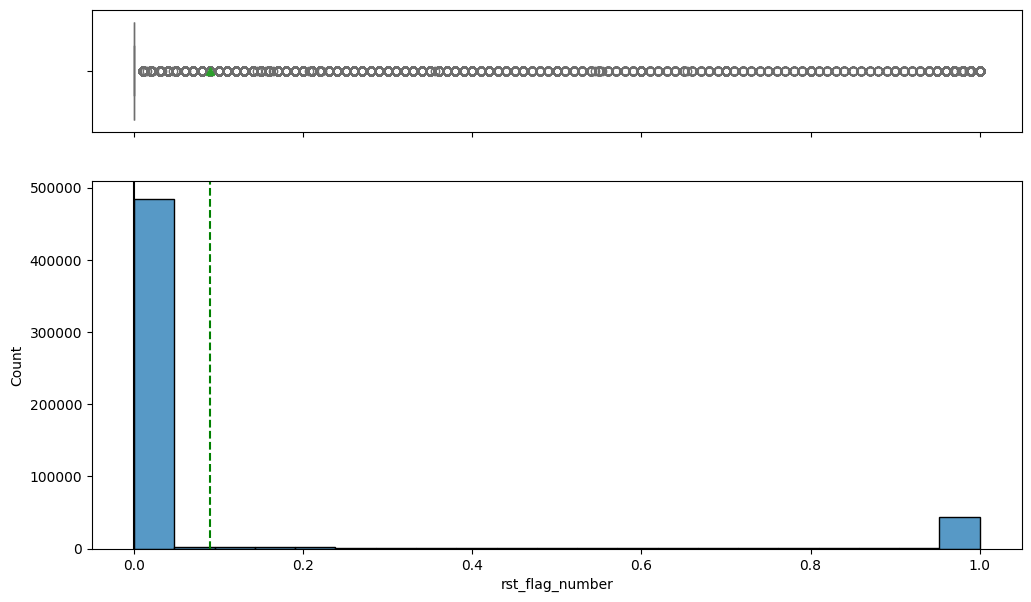

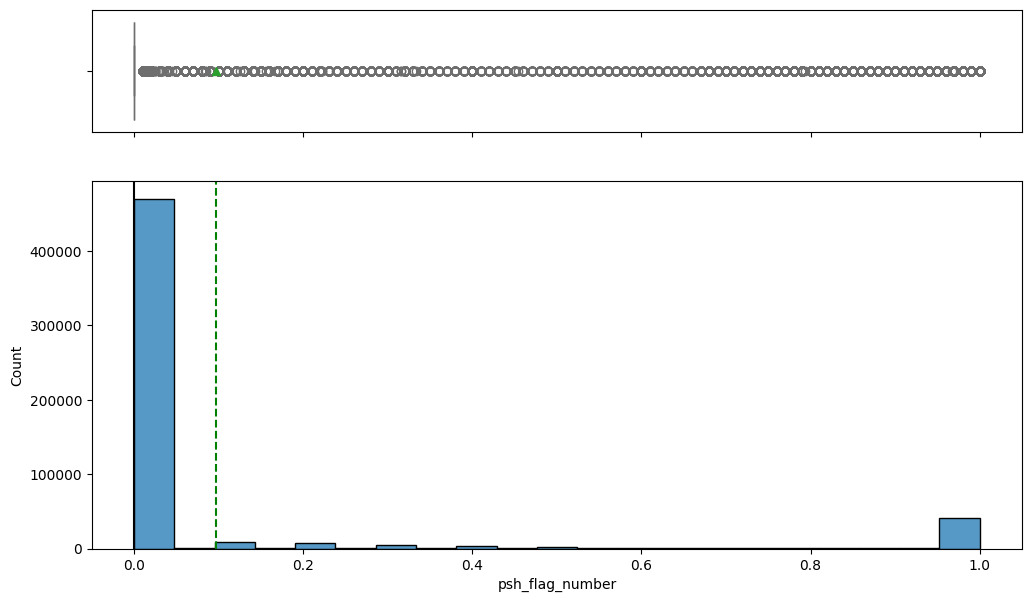

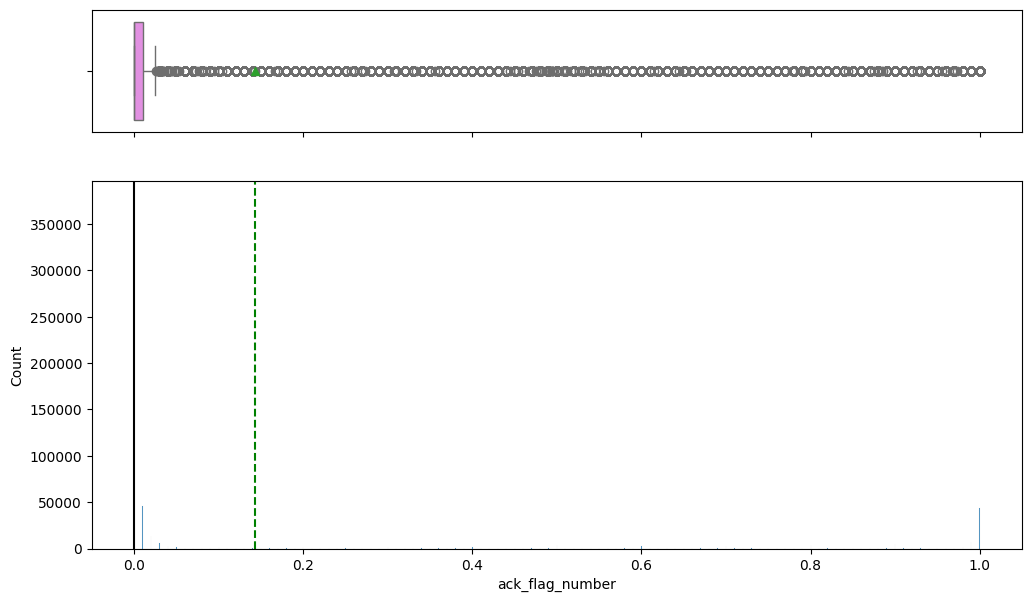

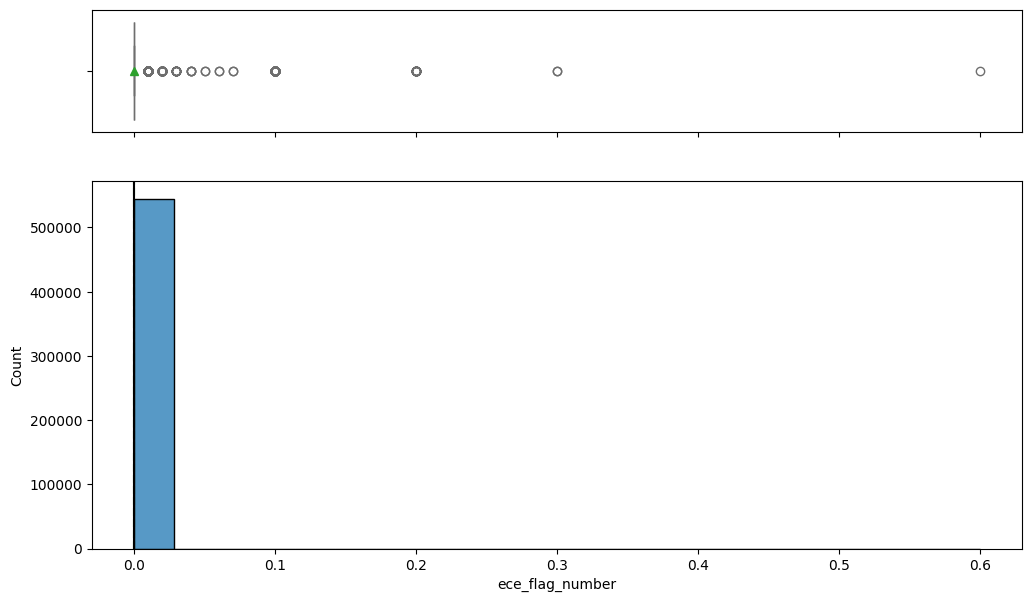

In [ ]:
for i in merged_df.columns[:10]:
    histogram_boxplot(merged_df, i, figsize=(12, 7), kde=False, bins=None)

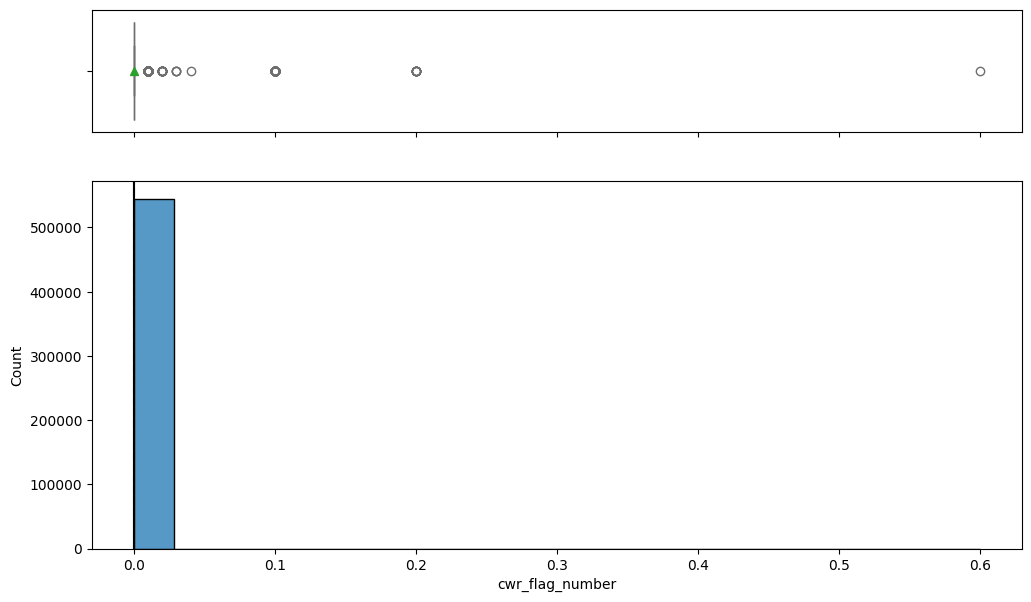

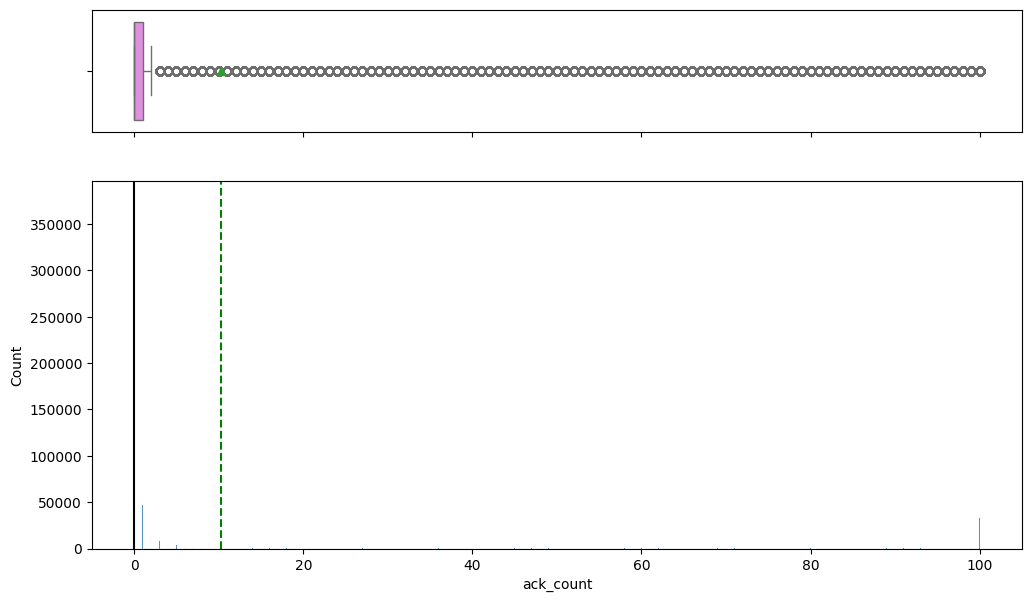

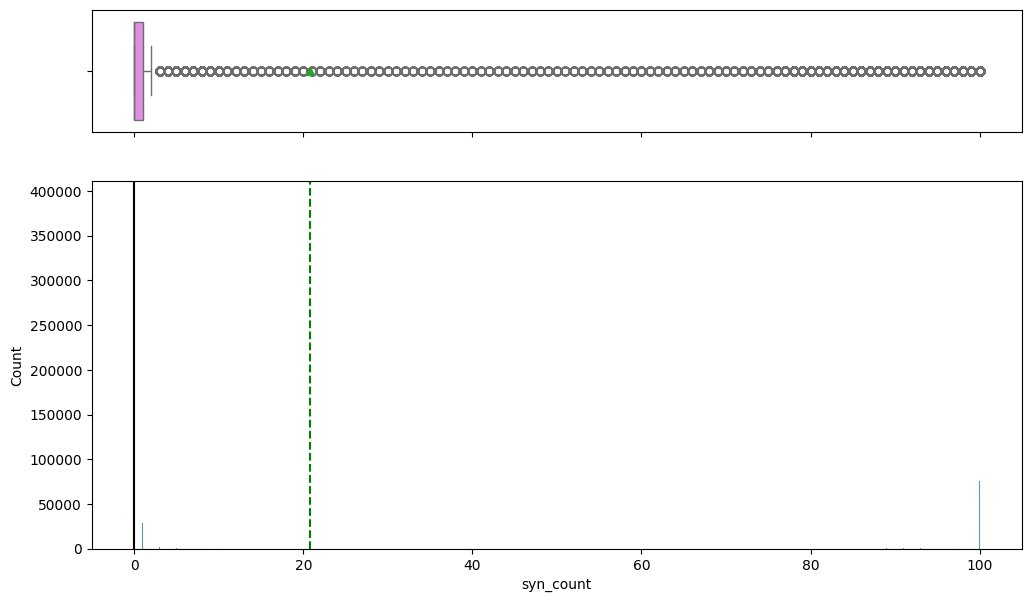

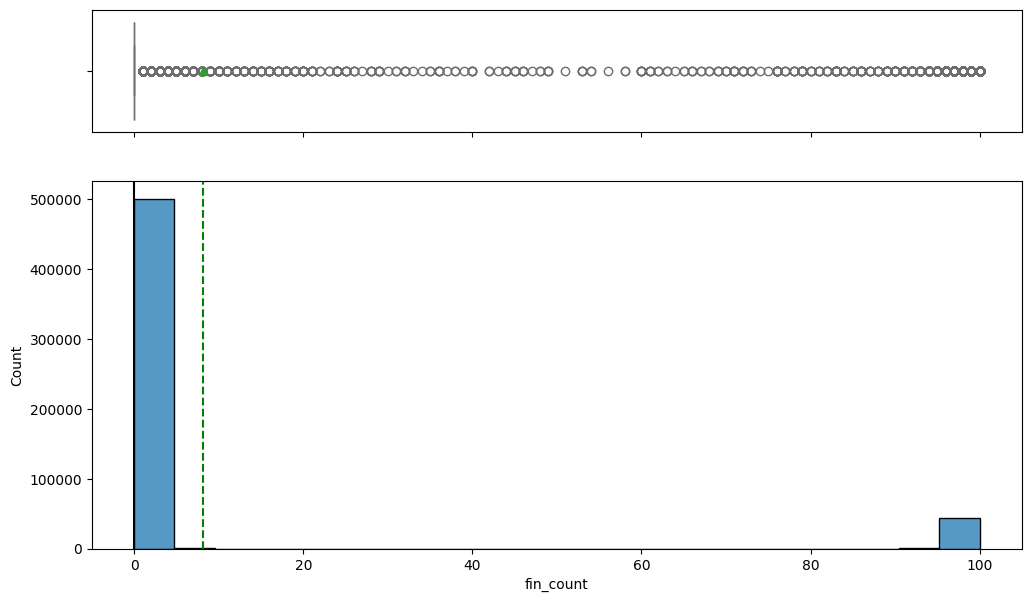

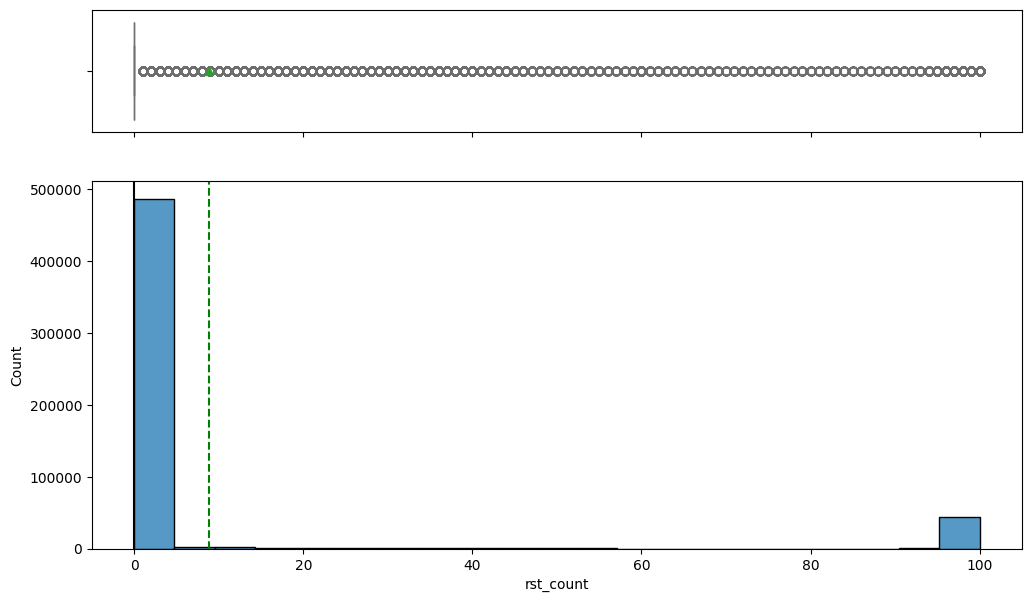

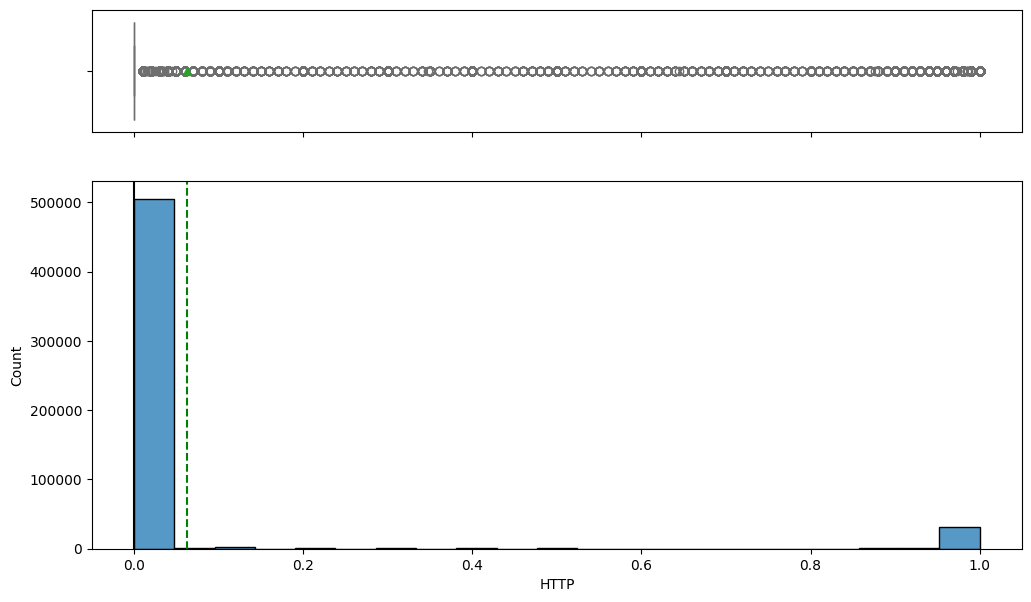

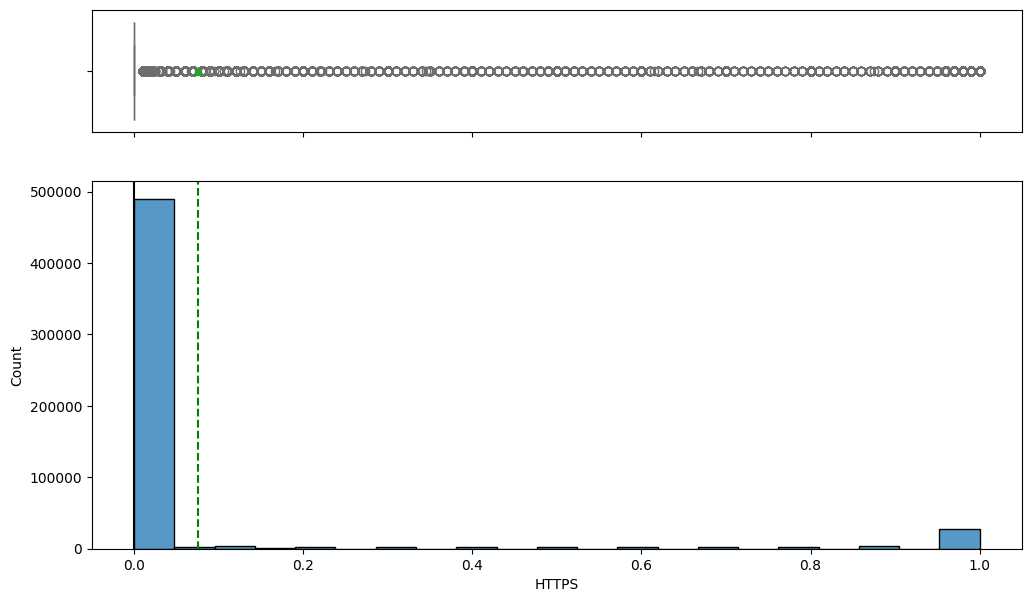

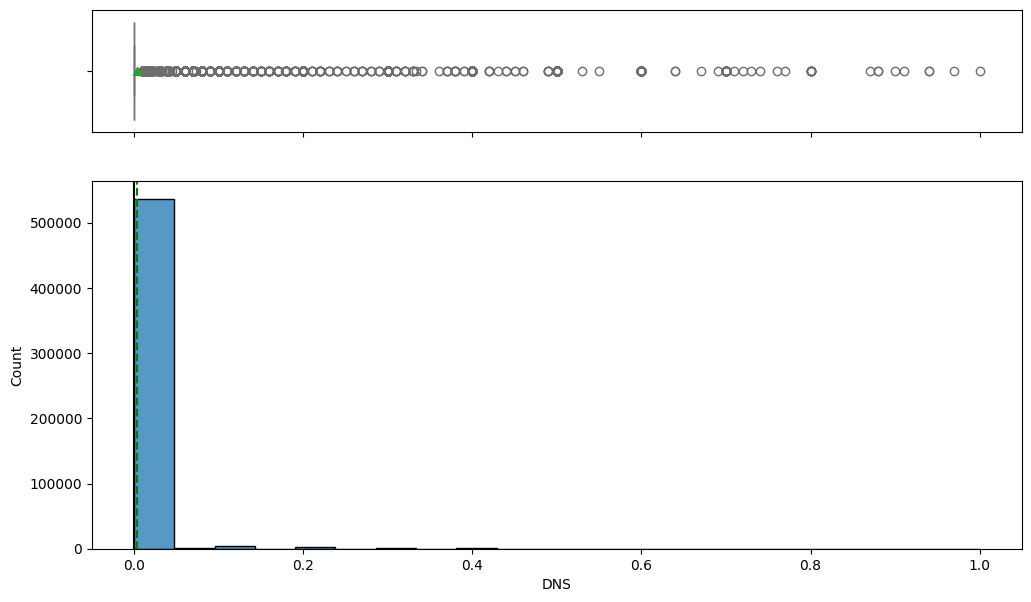

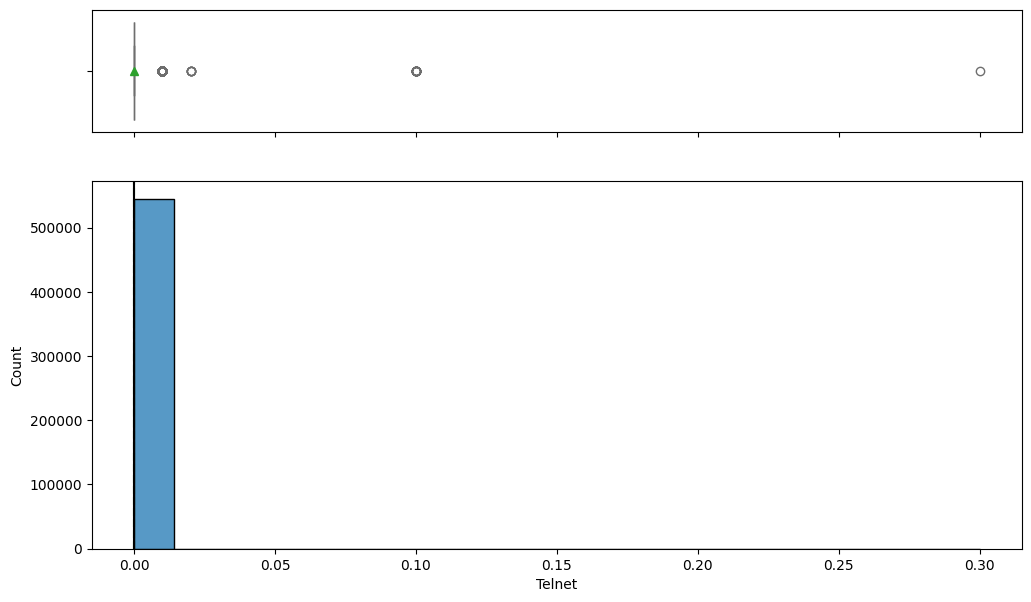

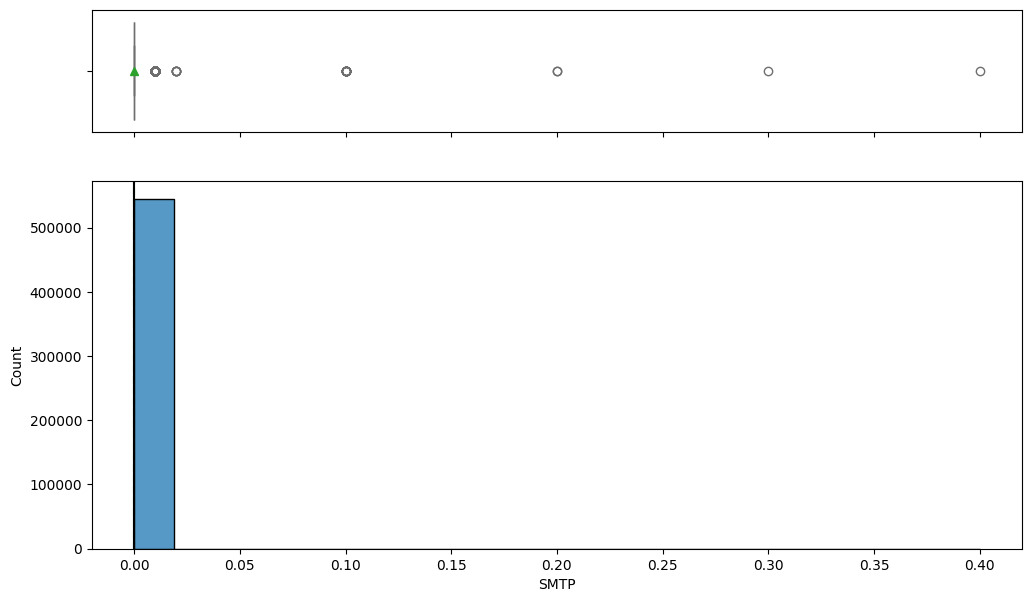

In [ ]:
for i in merged_df.columns[10:20]:
    histogram_boxplot(merged_df, i, figsize=(12, 7), kde=False, bins=None)

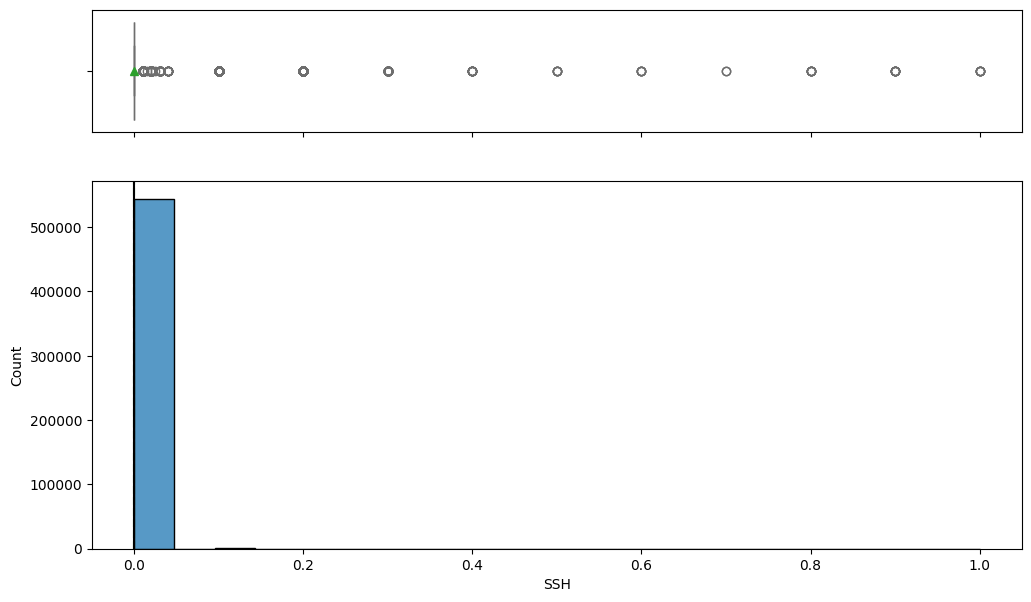

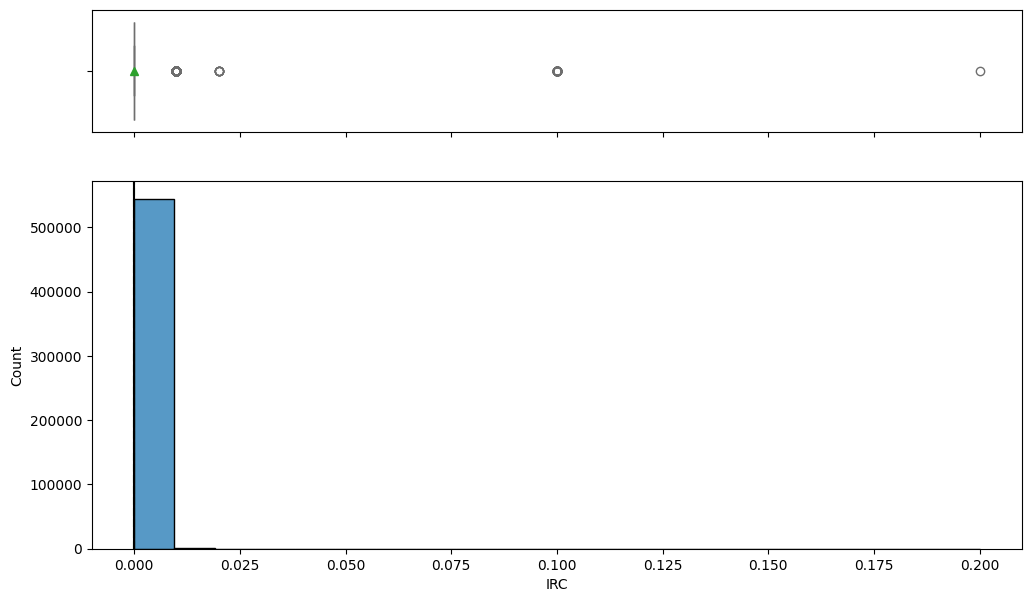

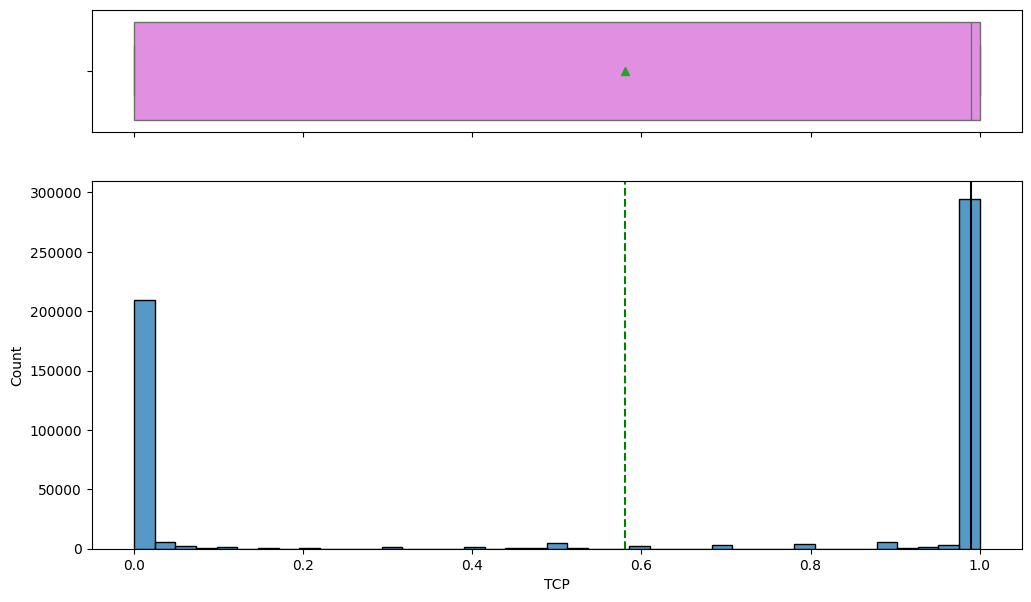

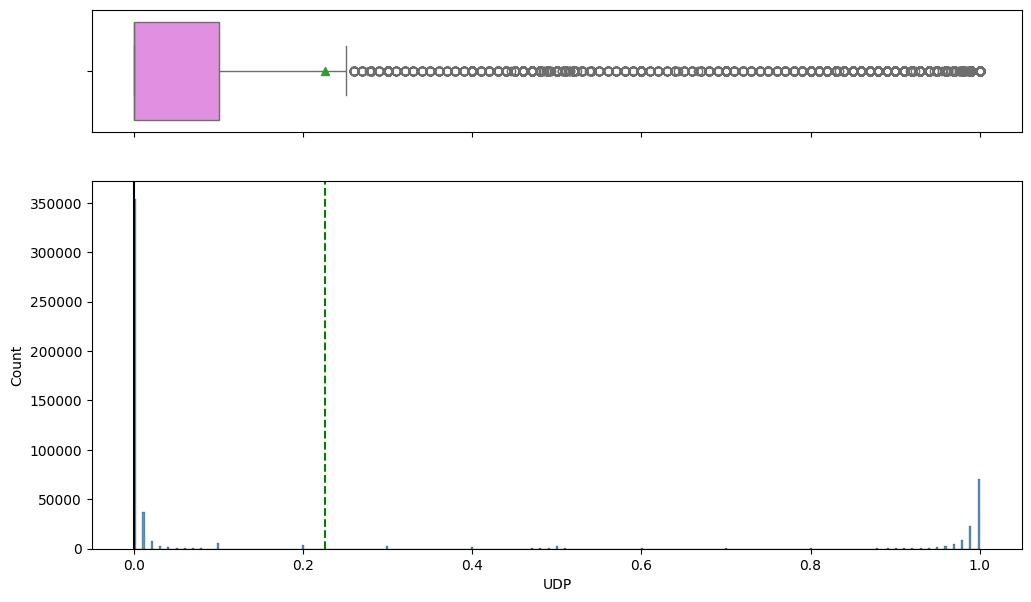

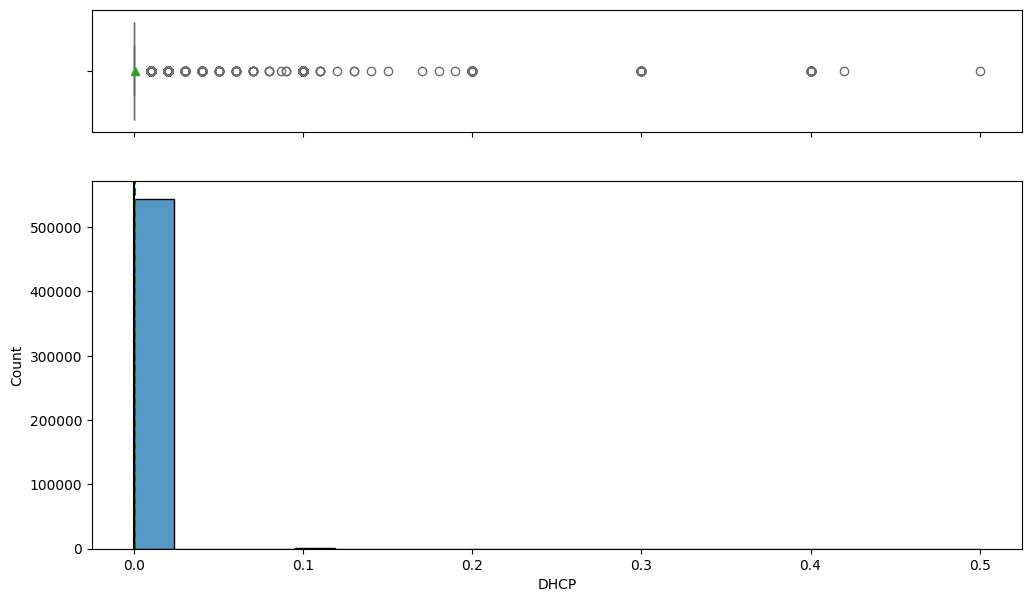

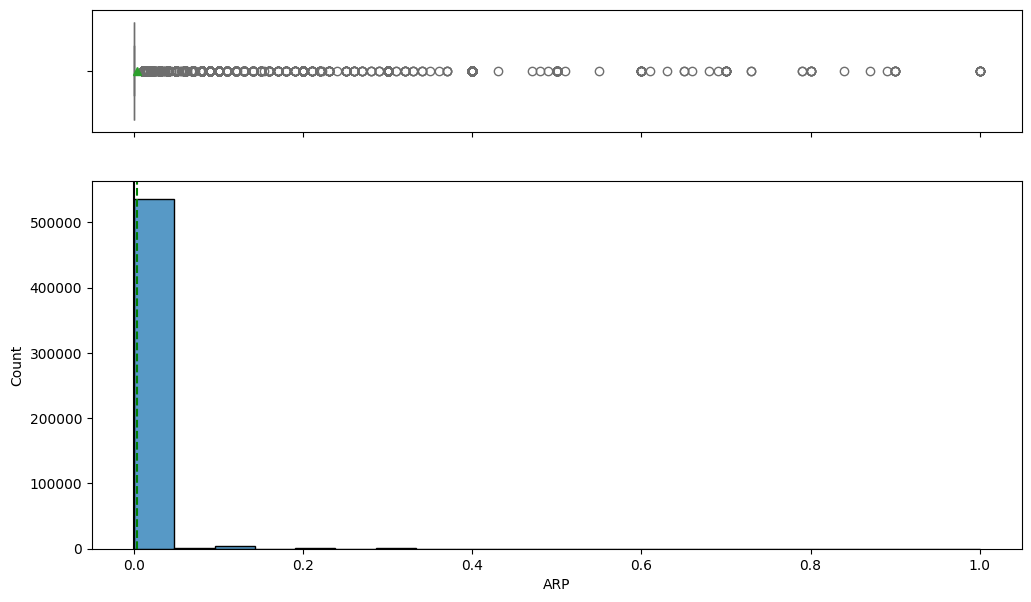

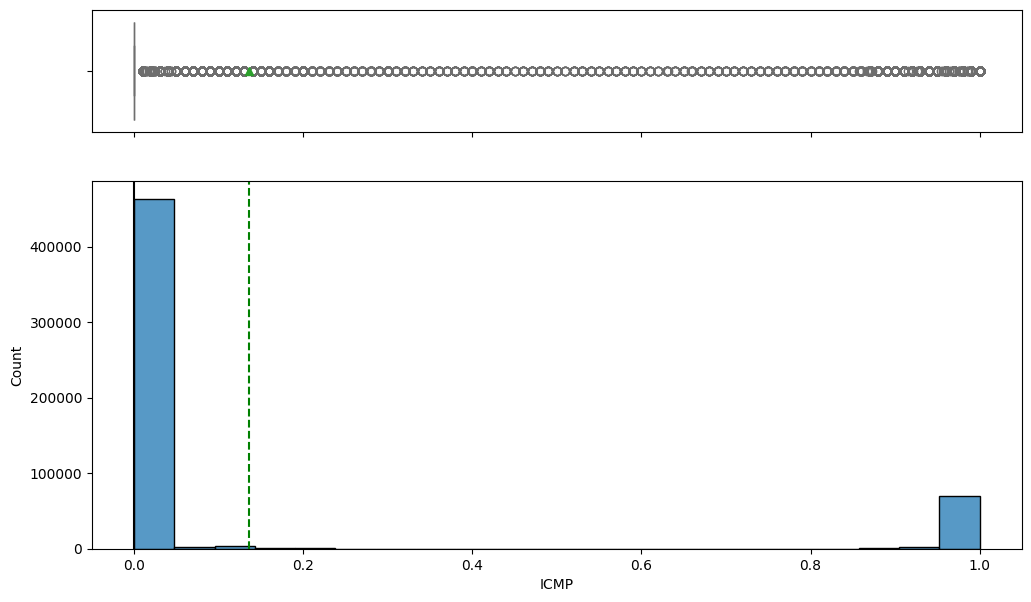

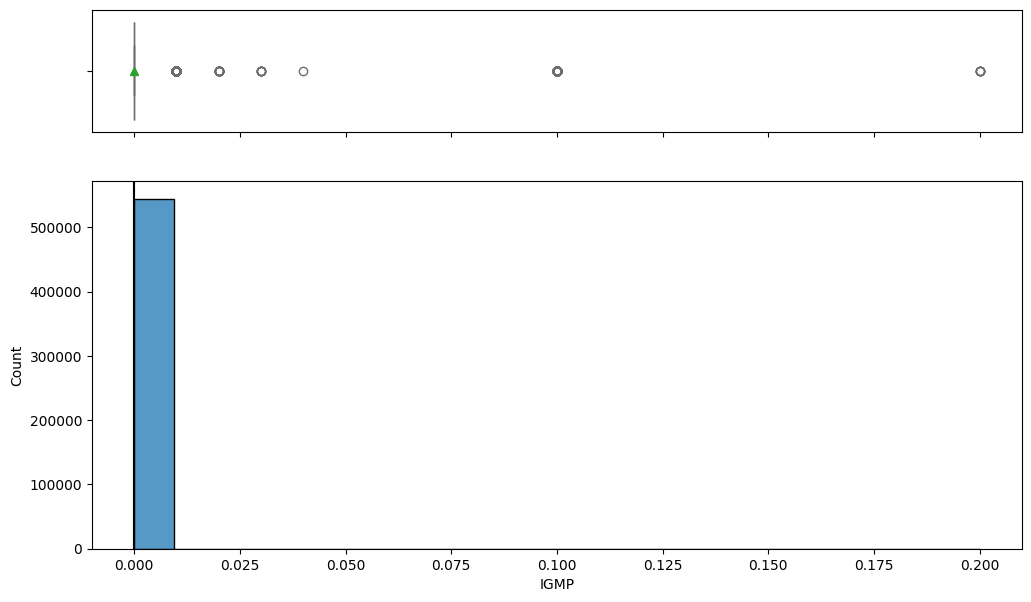

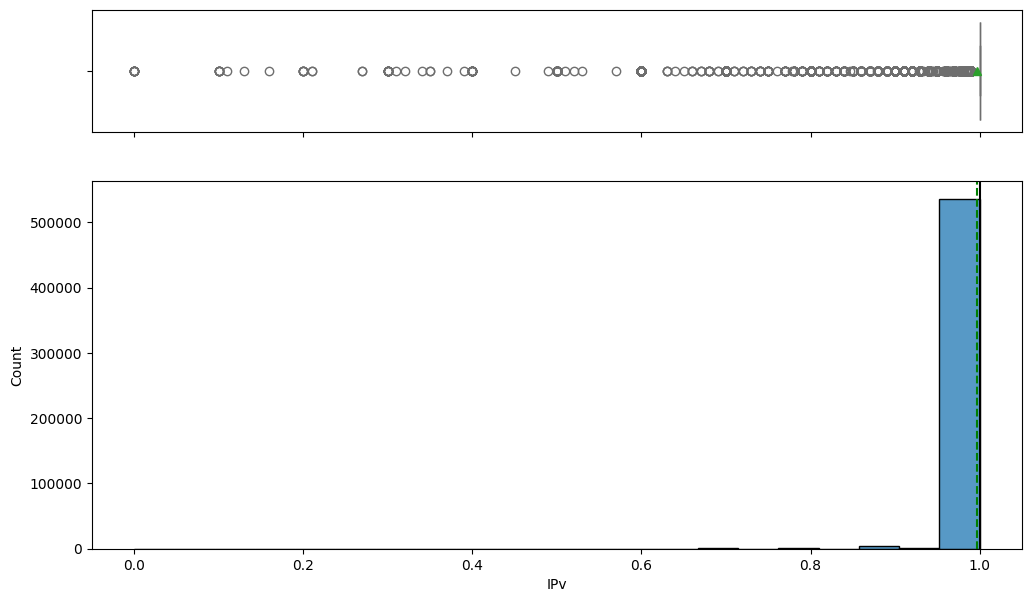

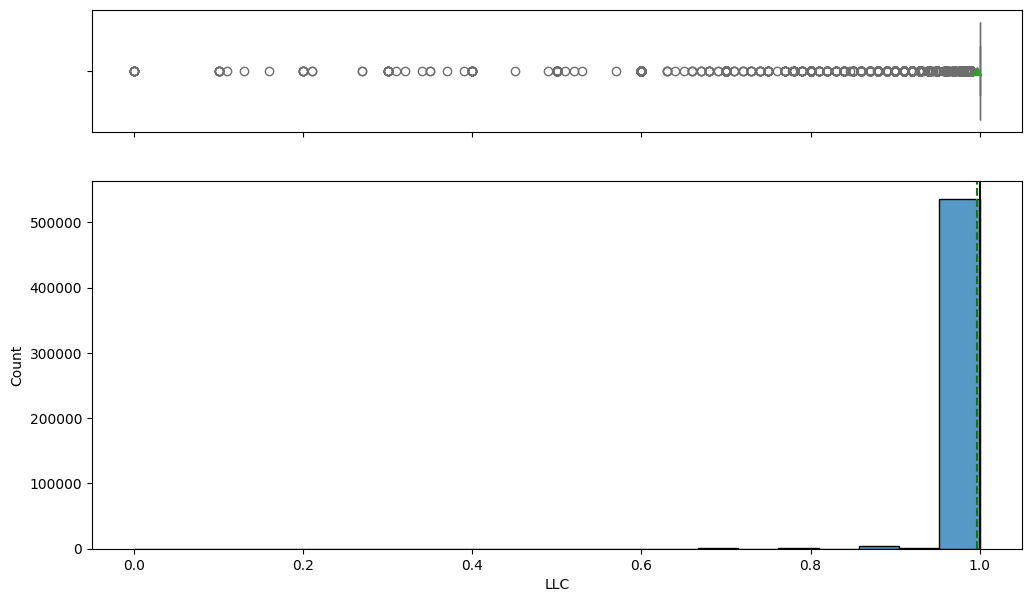

In [ ]:
for i in merged_df.columns[20:30]:
    histogram_boxplot(merged_df, i, figsize=(12, 7), kde=False, bins=None)

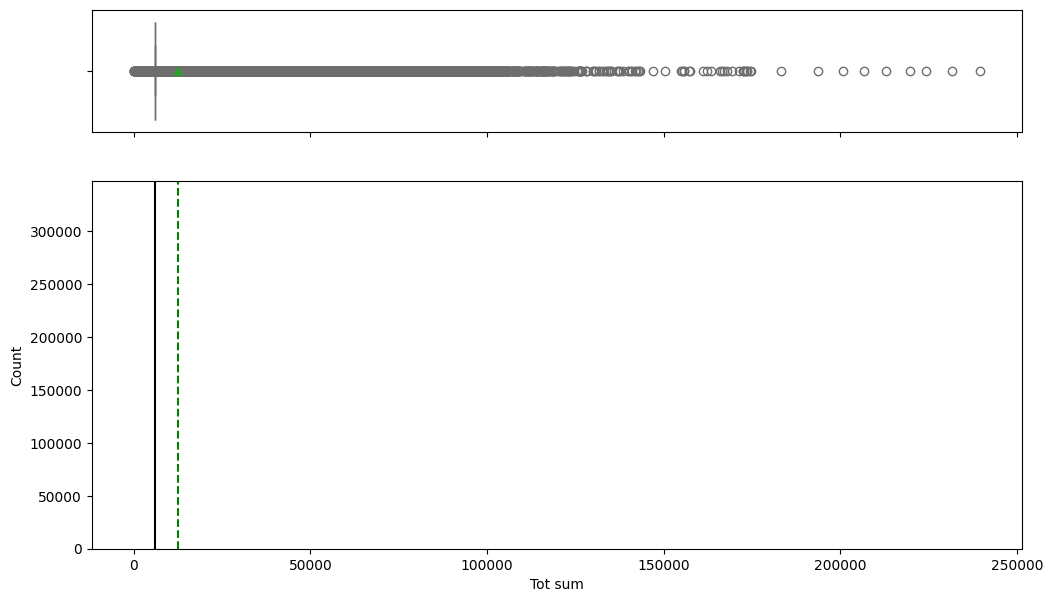

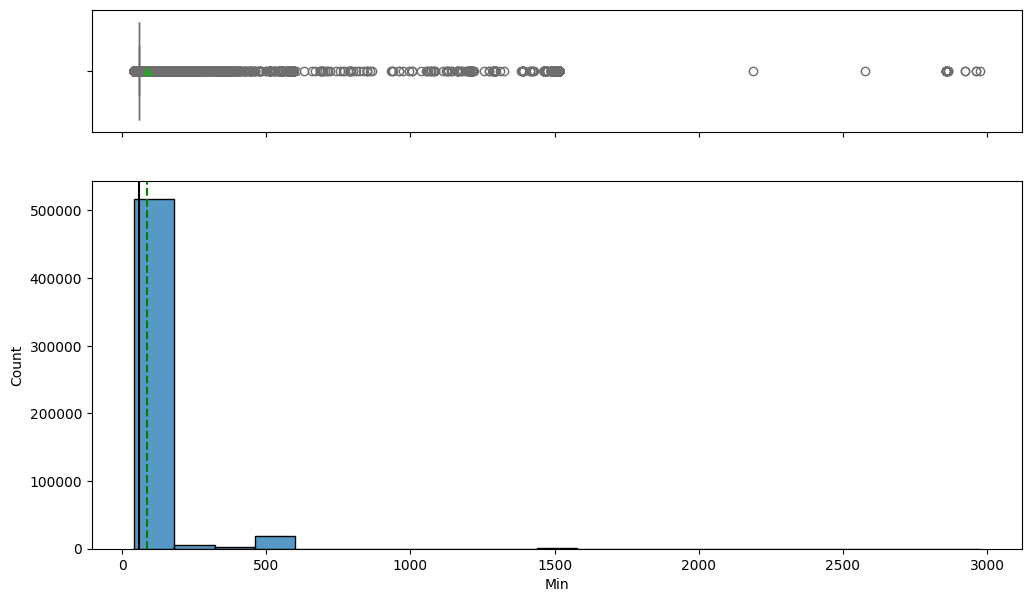

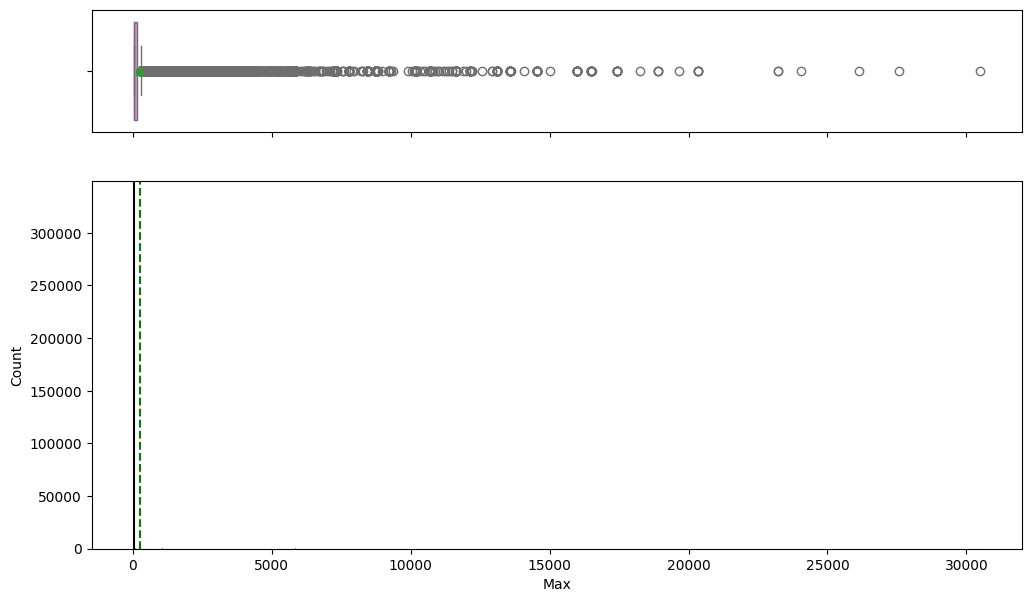

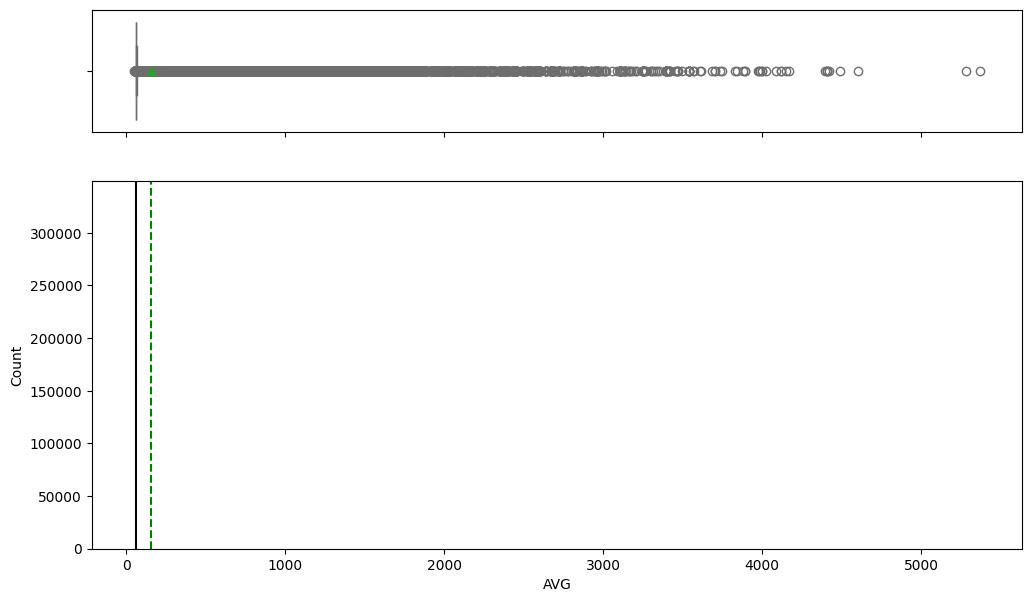

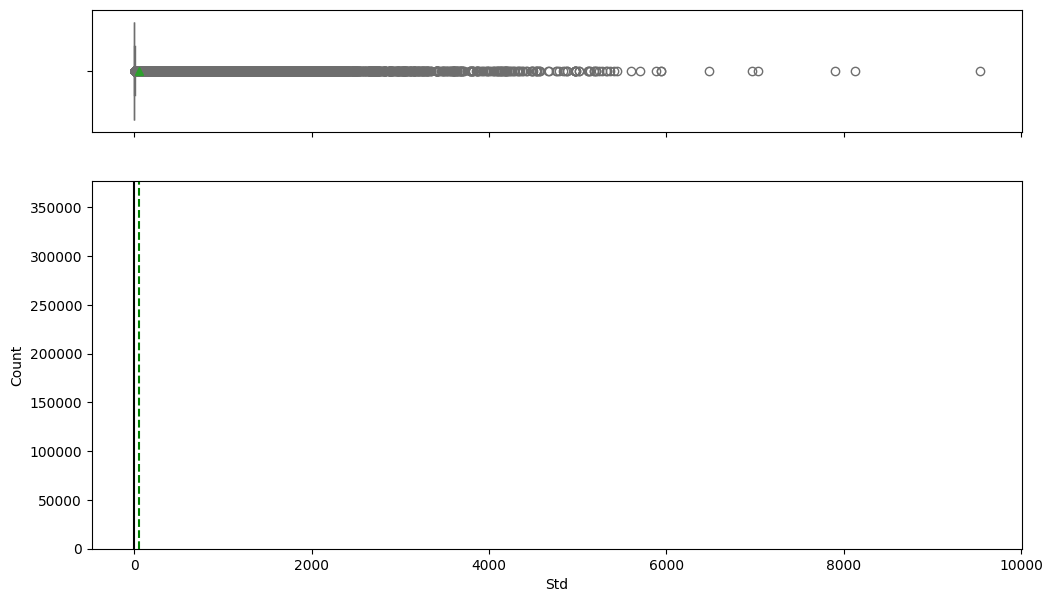

In [ ]:
for i in merged_df.columns[30:35]:
    histogram_boxplot(merged_df, i, figsize=(12, 7), kde=False, bins=None)

In [ ]:
for i in merged_df.columns[35:39]:
    histogram_boxplot(merged_df, i, figsize=(12, 7), kde=False, bins=None)

#### BIVARITE ANALYSIS

In [ ]:
merged_df.columns

Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance', 'Label',
       'Label_class', 'Attack_subtype'],
      dtype='object')

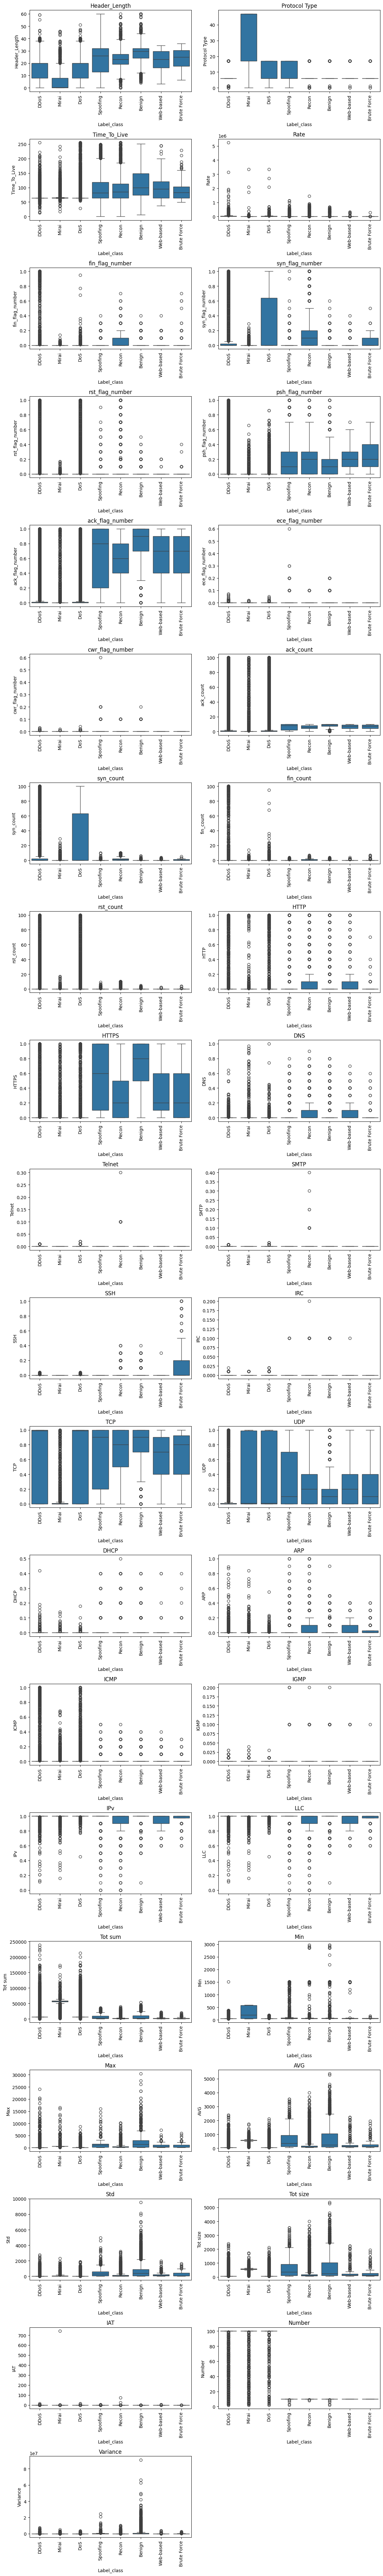

In [ ]:
cols = merged_df[
    ['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
     'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
     'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
     'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
     'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
     'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
     'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance'
    ]
].columns.tolist()

# Convert Label_class to categorical if necessary
merged_df["Label_class"] = merged_df["Label_class"].astype(str)

# Dynamically set number of rows
rows = (len(cols) // 2) + (len(cols) % 2)
plt.figure(figsize=(12, rows * 4))

for i, variable in enumerate(cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(x="Label_class", y=variable, data=merged_df)
    plt.xticks(rotation=90)
    plt.title(variable)

plt.tight_layout()
plt.show()


In [ ]:
def plot_individual_line_graphs(df, x_col, y_cols, figsize=(10, 5), save_plots=False, save_dir="plots/"):
    """
    Generates individual line plots for multiple numerical columns against a categorical column.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    x_col : str
        The column to be used as the x-axis (should be categorical or time-based).
    y_cols : list
        List of numerical columns to be plotted on the y-axis.
    figsize : tuple, optional
        The figure size for each plot (default is (10, 5)).
    save_plots : bool, optional
        If True, saves the plots as PNG images instead of displaying them (default is False).
    save_dir : str, optional
        Directory path where plots will be saved if save_plots=True (default is "plots/").

    Raises:
    ------
    ValueError
        If x_col is not in the DataFrame.
        If none of the y_cols exist in the DataFrame.
        If y_cols contain non-numeric data.
    """

    try:
        # Validate x_col
        if x_col not in df.columns:
            raise ValueError(f"Column '{x_col}' not found in the DataFrame.")

        # Validate y_cols
        y_cols = [col for col in y_cols if col in df.columns]
        if not y_cols:
            raise ValueError("None of the specified y_cols are present in the DataFrame.")

        # Ensure x_col is categorical or datetime
        df[x_col] = df[x_col].astype(str)

        # Ensure y_cols are numeric
        non_numeric_cols = [col for col in y_cols if not pd.api.types.is_numeric_dtype(df[col])]
        if non_numeric_cols:
            raise ValueError(f"Columns {non_numeric_cols} must be numeric.")

        # Loop through each variable and plot
        for col in y_cols:
            plt.figure(figsize=figsize)
            sns.lineplot(x=df[x_col], y=df[col], marker="o", color="b")

            plt.xticks(rotation=90)
            plt.xlabel(x_col)
            plt.ylabel(col)
            plt.title(f"Line Plot of {col} against {x_col}")
            plt.grid(True)

            if save_plots:
                import os
                os.makedirs(save_dir, exist_ok=True)
                plt.savefig(f"{save_dir}{col}_vs_{x_col}.png", dpi=300)
                plt.close()  # Close the plot to prevent display issues
            else:
                plt.show()

    except Exception as e:
        print(f"Error: {e}")

# Example Usage
cols = [
    'Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
    'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
    'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
    'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
    'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
    'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance'
]

# Convert Label_class to categorical if necessary
merged_df["Label_class"] = merged_df["Label_class"].astype(str)

# Call function (set save_plots=True if you want to save the plots instead of displaying them)
plot_individual_line_graphs(merged_df, "Label_class", cols)

Output hidden; open in https://colab.research.google.com to view.

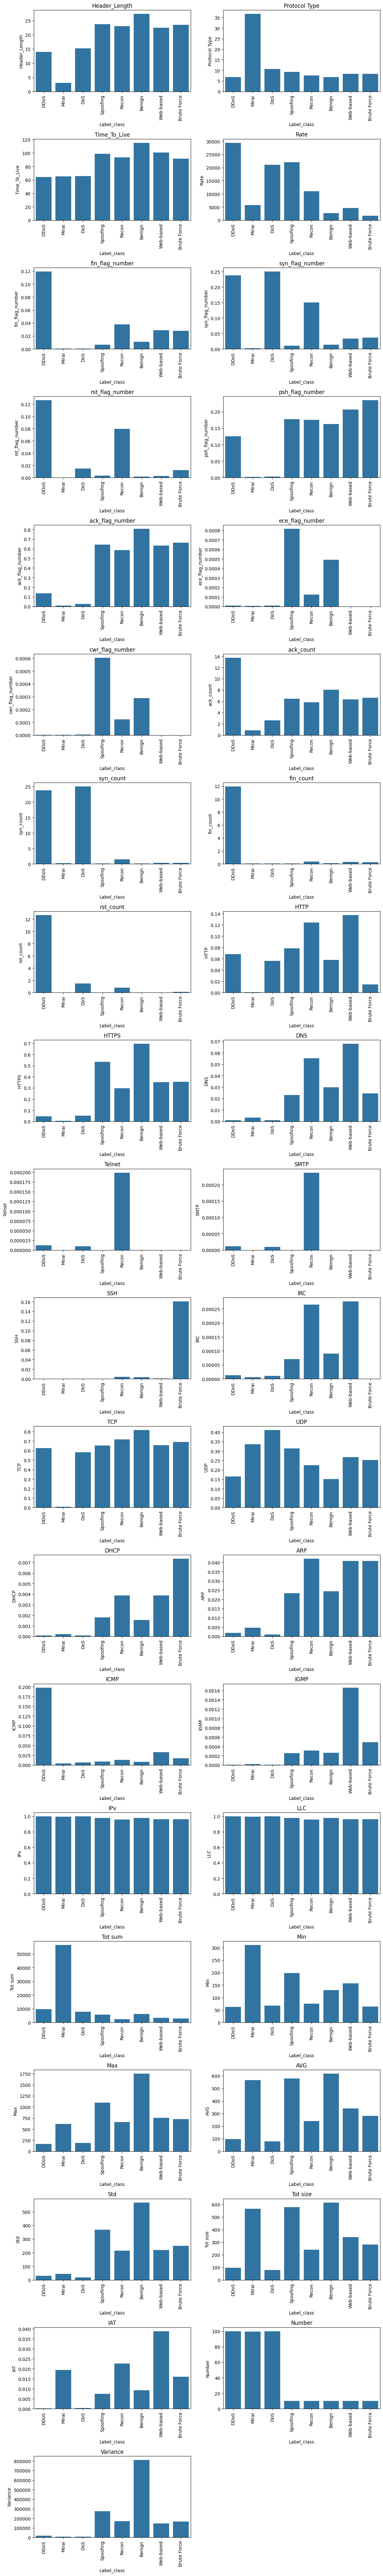

In [ ]:
# Convert Label_class to categorical if necessary
merged_df["Label_class"] = merged_df["Label_class"].astype(str)

# Dynamically set number of rows for subplots
rows = (len(cols) // 2) + (len(cols) % 2)

# Create figure for subplots
plt.figure(figsize=(12, rows * 4))

# Loop through each column and create a bar plot
for i, variable in enumerate(cols):
    plt.subplot(rows, 2, i + 1)
    sns.barplot(x="Label_class", y=variable, data=merged_df, errorbar=None)  # 'errorbar=None' to turn off confidence intervals
    plt.xticks(rotation=90)
    plt.title(variable)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()